In [1]:
import pandas as pd
import numpy as np


import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/"
filelist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv"):
        filelist.append(dir_path + file)
filelist

['/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/Sell_Bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/covid_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/Ukraine war_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/Buy_Bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/ethereum_v2.csv']

In [4]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Crypto Data/"
coinlist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv")and "binance" not in file and "uniswap" not in file and "chainlink" not in file:
        coinlist.append(dir_path + file)
coinlist

['/content/drive/MyDrive/S&P Crypto Project/Crypto Data/bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_exlarge_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/ether_v2.csv']

In [5]:
filelist[1][84:-7]

'Sell_Bitcoin'

In [6]:
def cal_corr(file, coinlist):
  df_st = pd.read_csv(file)
  indexname = file[84:-7]
  df_st.columns = ['date',indexname]
  df_st[indexname+'_change'] = df_st[indexname].pct_change()

  for coin in coinlist:
    df_coin = pd.read_csv(coin)
    coinname = coin[54:-7]
    df_coin.columns = ['Date',coinname+'_price']
    df_coin[coinname+'_return'] = df_coin[coinname+'_price'].pct_change()

    df_st = df_st.merge(df_coin, left_on = 'date', right_on = 'Date', how = 'left')
    df_st.drop('Date',axis = 1,inplace = True)
    df_st[coinname+'_corr'] = df_st[indexname+'_change'].rolling(100).corr(df_st[coinname+'_return'])

    lagged_days = [1,3,5,7,9]
    for day in lagged_days:
      df_st[coinname+str(day)+'lag_corr'] = df_st[indexname+'_change'].rolling(100).corr(df_st[coinname+'_return'].shift(day))
    
  df_st.set_index('date',inplace=True)
  

  col_list = []
  for col in df_st.columns:
      if col.endswith("_corr"):
        col_list.append(col)
  df_small = df_st[col_list]
  df_valid = df_small[~df_small.isnull().all(1)]
  filename = file[84:-7]
  df_valid.to_csv("/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/"+filename+"_return_corr.csv")


In [7]:
for file in filelist:
  cal_corr(file,coinlist)

In [8]:
dir2 = "/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/"
filelist2 =[]
for file in os.listdir(dir2):
    if file.endswith("_corr.csv"):
        filelist2.append(dir2 + file)
filelist2

['/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/bitcoin_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/Sell_Bitcoin_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/covid_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/Ukraine war_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/ethereum_return_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/return_correlation_summary_gt/Buy_Bitcoin_return_corr.csv']

- no significance

<Axes: title={'center': 'bitcoin google trend'}, xlabel='date'>

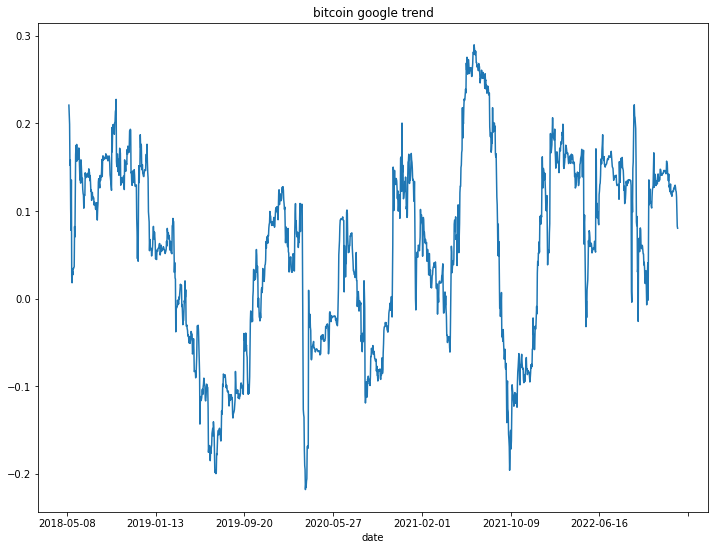

In [15]:
dfnew = pd.read_csv(filelist2[0]) #bitcoin
dfnew.set_index('date',inplace = True)
dfnew['bitcoin7lag_corr'].plot(figsize = (12,9),title = 'bitcoin google trend')

- no significance

<Axes: title={'center': 'sell bitcoin google trend'}, xlabel='date'>

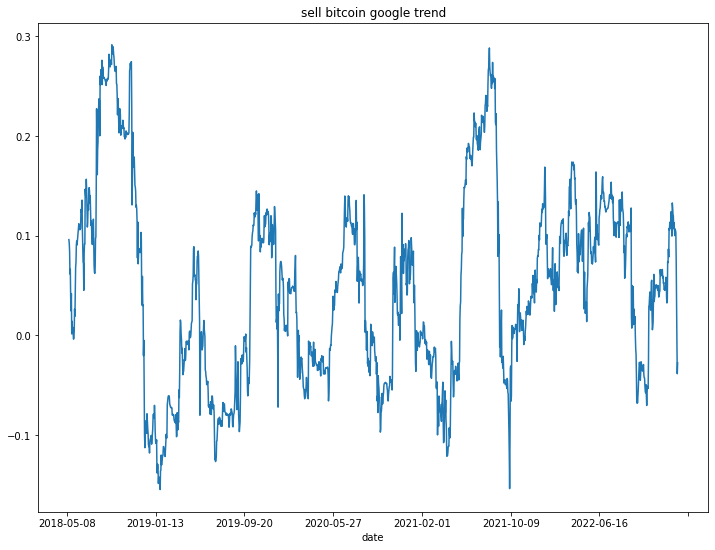

In [16]:
df2 = pd.read_csv(filelist2[1]) #sell bitcoin
df2.set_index('date',inplace = True)
df2['bitcoin7lag_corr'].plot(figsize = (12,9),title = 'sell bitcoin google trend')

- no significance

<Axes: title={'center': 'covid google trend'}, xlabel='date'>

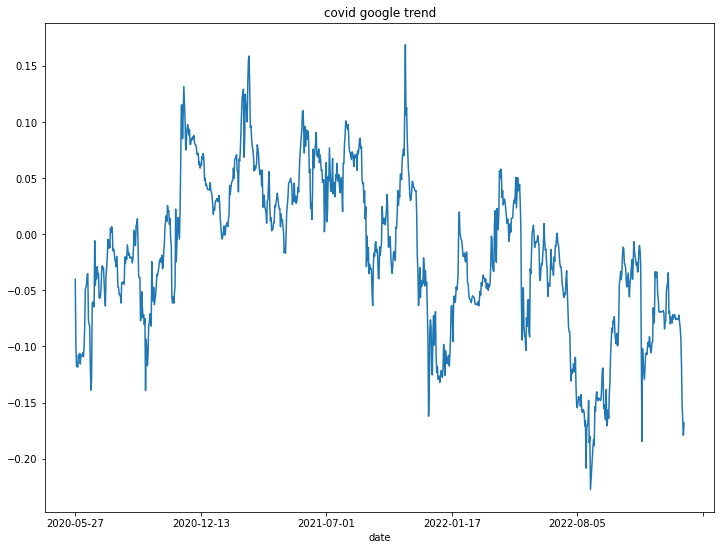

In [22]:
df3 = pd.read_csv(filelist2[2]) #covid 
df3.set_index('date',inplace = True)
df3['bitcoin7lag_corr'].plot(figsize = (12,9),title = 'covid google trend')

- no significance

<Axes: title={'center': 'ukraine war google trend'}, xlabel='date'>

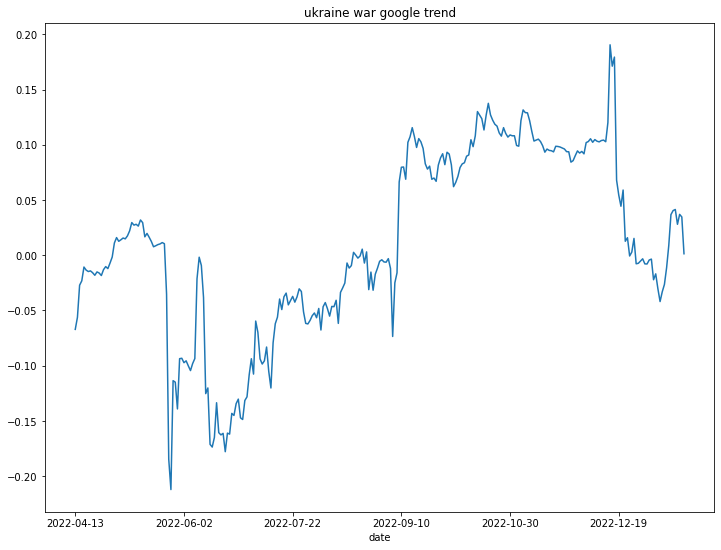

In [32]:
df4 = pd.read_csv(filelist2[3]) #ukraine war
df4.set_index('date',inplace = True)
df4['bitcoin_corr'].plot(figsize = (12,9),title = 'ukraine war google trend')

- no significance

<Axes: title={'center': 'ethereum google trend'}, xlabel='date'>

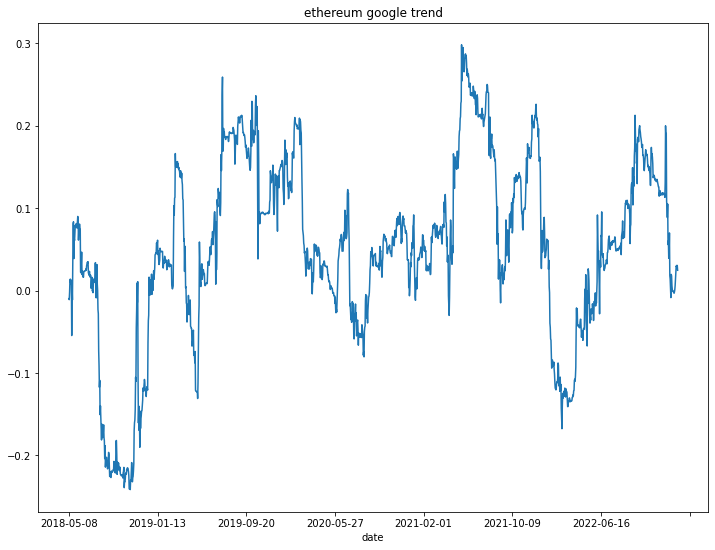

In [40]:
df5 = pd.read_csv(filelist2[4]) #ethereum
df5.set_index('date',inplace = True)
df5['bitcoin_corr'].plot(figsize = (12,9),title = 'ethereum google trend')

- no significance

<Axes: title={'center': 'buy bitcoin google trend'}, xlabel='date'>

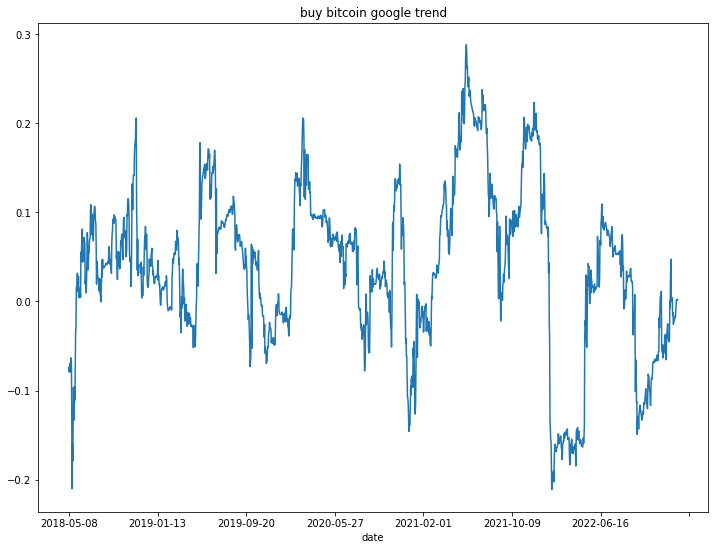

In [46]:
df6 = pd.read_csv(filelist2[5]) #buy bitcoin
df6.set_index('date',inplace = True)
df6['bitcoin1lag_corr'].plot(figsize = (12,9),title = 'buy bitcoin google trend')

In [ ]:
|